# Tutorial: From vector spaces to manifolds

## Set up

Before starting this tutorial, we set the working directory to be the root of the geomstats repository. In order to have the code working on your machine, you need to change this path to the path of your geomstats repository.

In [1]:
import os
import subprocess

geomstats_gitroot_path = subprocess.check_output(
    ['git', 'rev-parse', '--show-toplevel'], 
    universal_newlines=True)

os.chdir(geomstats_gitroot_path[:-1])

print('Working directory: ', os.getcwd())

Working directory:  /code/geomstats


We import the backend that will be used for geomstats computations and set a seed for reproducibility of the results.

In [2]:
import geomstats.backend as gs

gs.random.seed(2020)

INFO: Using numpy backend


Finally, we import the visualization module.

In [3]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

## From vector spaces to manifolds

In the previous tutorial, we visualized data that naturally belong to manifolds, i.e. generalizations of vector spaces that are allowed to have curvature. 

A simple example of such data is the coordinates of cities on the surface of the earth: they belong to a sphere, which is a manifold.

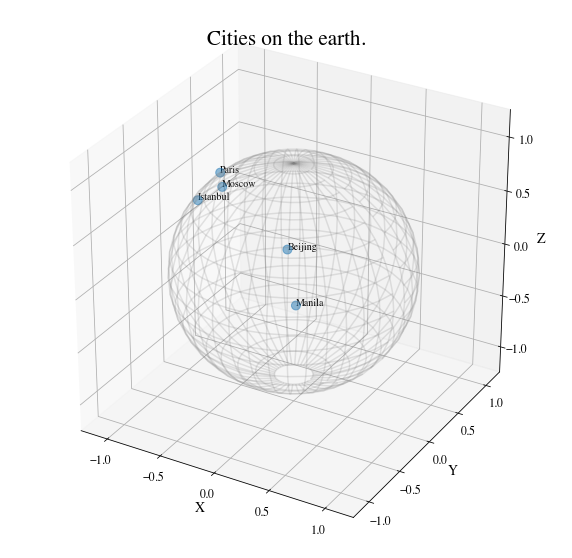

In [4]:
import geomstats.datasets.utils as data_utils

data, names = data_utils.load_cities()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(data[15:20], ax=ax, space='S2', label=names[15:20], s=80, alpha=0.5)

ax.set_title('Cities on the earth.');

The purpose of this tutorial is to show how we can perform elementary computations on such data.

## From addition to exponential map 

The elementary operations on a vector space are: addition, substraction and multiplication by a scalar. We can add a vector to a point, substract two points to get a vector, or multiply a vector by a scalar value.

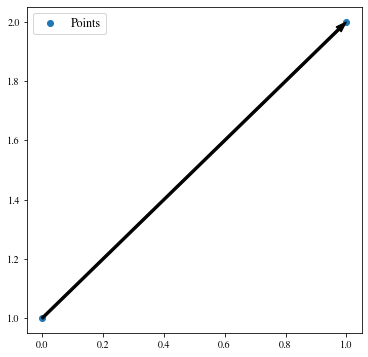

In [5]:
%matplotlib inline

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

point_a = gs.array([0, 1])
point_b = gs.array([1, 2])
vector = point_b - point_a

ax.scatter(point_a, point_b, label='Points')
ax.arrow(gs.to_numpy(point_a[0]), gs.to_numpy(point_a[1]), 
         dx=gs.to_numpy(vector[0]), dy=gs.to_numpy(vector[1]), 
         width=0.008, length_includes_head=True, color='black')

ax.legend();

For points on a manifold, like the sphere, the same operations are not permitted. Indeed, adding a vector to a point will not give a point that belongs to the manifold.

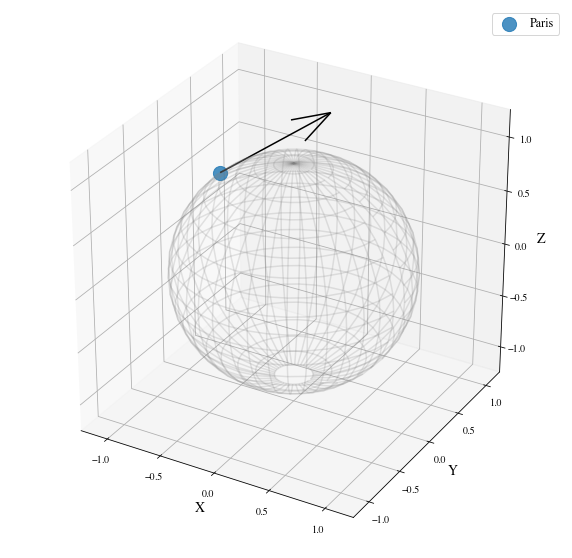

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

paris = data[19]
vector = gs.array([1, 0, 0.8])

ax = visualization.plot(paris, ax=ax, space='S2', s=200, alpha=0.8, label='Paris')

arrow = visualization.Arrow3D(paris, vector=vector)
arrow.draw(ax, color='black')
ax.legend();

The exponential map is the operation that generalizes the addition of a vector to a point, on manifolds. 

The exponential map takes a point and a tangent vector as inputs, and outputs the point on the manifold that is reached by "shooting" with the tangent vector. "Shooting" means taking the path of shortest length. This path is called a "geodesic".

In [7]:
from geomstats.geometry.hypersphere import Hypersphere

sphere = Hypersphere(dim=2)

paris = data[19]
vector = gs.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=paris)

result = sphere.metric.exp(tangent_vector, base_point=paris)

geodesic = sphere.metric.geodesic(
        initial_point=paris,
        initial_tangent_vec=tangent_vector)

points_on_geodesic = geodesic(gs.linspace(0., 1., 30))

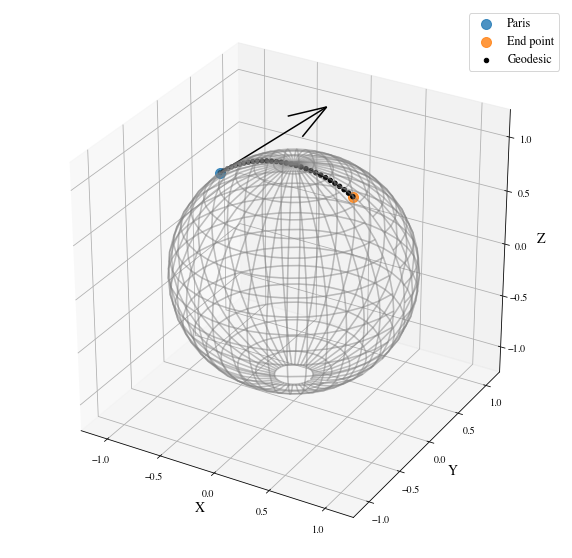

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax = visualization.plot(paris, ax=ax, space='S2', s=100, alpha=0.8, label='Paris')
ax = visualization.plot(result, ax=ax, space='S2', s=100, alpha=0.8, label='End point')
ax = visualization.plot(
    points_on_geodesic, ax=ax, space='S2', color='black', label='Geodesic')

arrow = visualization.Arrow3D(paris, vector=tangent_vector)
arrow.draw(ax, color='black')
ax.legend();

## From substraction to logarithm map

The logarithm map is the operation that generalizes the substraction of two points, that gives a vector.

The logarithm map takes two points on the manifold as inputs, and outputs the tangent vector that is required to "shoot" from one point to the other.

In [9]:
paris = data[19]
beijing = data[15]

log = sphere.metric.log(point=beijing, base_point=paris)

geodesic = sphere.metric.geodesic(
        initial_point=paris,
        end_point=beijing)

points_on_geodesic = geodesic(gs.linspace(0., 1., 30))

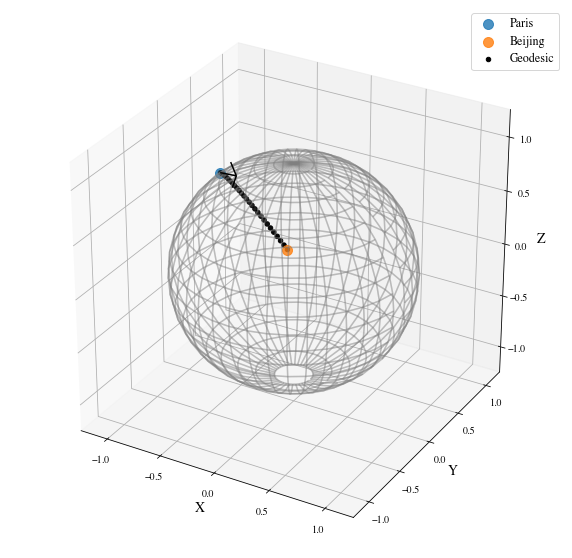

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax = visualization.plot(paris, ax=ax, space='S2', s=100, alpha=0.8, label='Paris')
ax = visualization.plot(beijing, ax=ax, space='S2', s=100, alpha=0.8, label='Beijing')
ax = visualization.plot(
    points_on_geodesic, ax=ax, space='S2', color='black', label='Geodesic')

arrow = visualization.Arrow3D(paris, vector=log)
arrow.draw(ax, color='black')
ax.legend();

## Geodesics

So far, we have given examples of geodesics on the sphere. The sphere is a simple manifold that is easy to visualize. Yet, `geomstats` provides many more manifolds, on which the exp and log are defined. Let's present a few more.

## Geodesics on the hyperbolic plane

We consider the hyperbolic geometry here. We define two points on the hyperbolic plane and compute the geodesic between them.

In [11]:
from geomstats.geometry.hyperboloid import Hyperboloid

hyperbolic = Hyperboloid(dim=2, coords_type='extrinsic')

initial_point = gs.array([gs.sqrt(2.), 1., 0.])
end_point = gs.array([2.5, 2.5])
end_point = hyperbolic.from_coordinates(end_point, 'intrinsic')

geodesic = hyperbolic.metric.geodesic(
    initial_point=initial_point, end_point=end_point)

points = geodesic(gs.linspace(0., 1., 10))

We use the visualization module to plot the two points and the geodesic between them. We can choose the visualization we prefer for points on the hyperbolic plane. First we visualize with the Poincare disk representation.

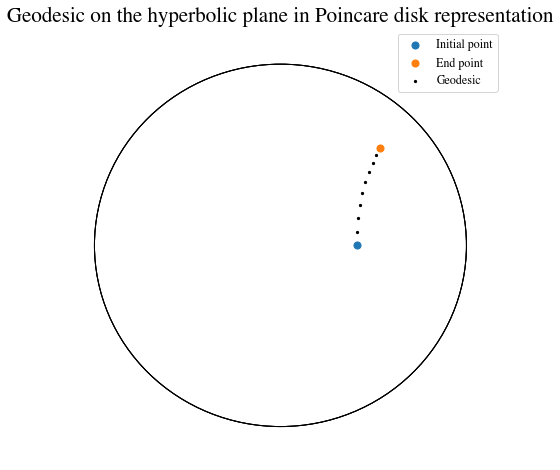

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

representation = 'H2_poincare_disk'

ax = visualization.plot(
    initial_point, ax=ax, space=representation, s=50, label='Initial point');
ax = visualization.plot(
    end_point, ax=ax, space=representation, s=50, label='End point');

ax = visualization.plot(
    points[1:-1], ax=ax, space=representation, s=5, color='black', label='Geodesic');
ax.set_title('Geodesic on the hyperbolic plane in Poincare disk representation')
ax.legend();

We can visualize the same geodesic in Klein disk representation.

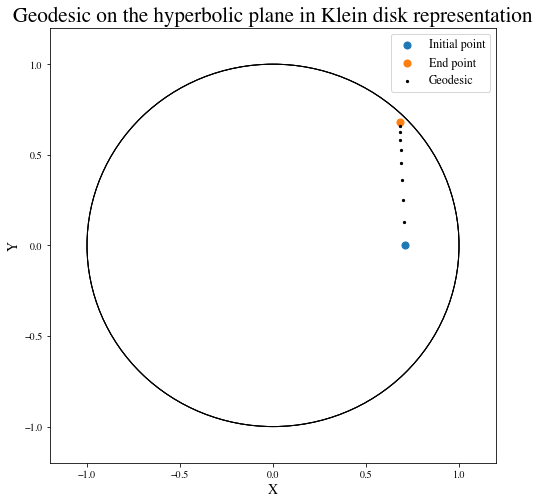

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

representation = 'H2_klein_disk'

ax = visualization.plot(
    initial_point, ax=ax, space=representation, s=50, label='Initial point');
ax = visualization.plot(
    end_point, ax=ax, space=representation, s=50, label='End point');

ax = visualization.plot(
    points[1:-1], ax=ax, space=representation, s=5, color='black', label='Geodesic');
ax.set_title('Geodesic on the hyperbolic plane in Klein disk representation')
ax.legend();

## Geodesics on the special euclidean group SE(3)

We consider the special euclidean group in 3D, which is the group of 3D rotations and 3D translations. One element of this group can be represented by a frame, oriented by the 3D rotation, and located by the 3D translation from the origin. 

We create two points in SE(3), and compute the geodesic between them.

In [14]:
from geomstats.geometry.special_euclidean import SpecialEuclidean

se3 = SpecialEuclidean(n=3, point_type='vector')
metric = se3.left_canonical_metric

initial_point = se3.identity
initial_tangent_vec = gs.array([1.8, 0.2, 0.3, 3., 3., 1.])
geodesic = metric.geodesic(
    initial_point=initial_point,
    initial_tangent_vec=initial_tangent_vec)

points = geodesic(gs.linspace(-3., 3., 40))

We visualize the geodesic in the group SE(3), which is a path of frames in 3D.

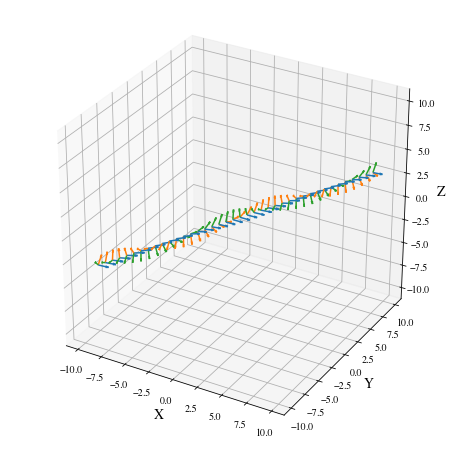

In [15]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(points, ax=ax, space='SE3_GROUP');